In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

EXPLORARTORY DATA ANALYSIS

In [10]:
df=pd.read_csv('AIML DATASET.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [13]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [14]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [15]:
df.isnull().sum().sum()

np.int64(0)

In [16]:
df.shape

(6362620, 11)

In [17]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

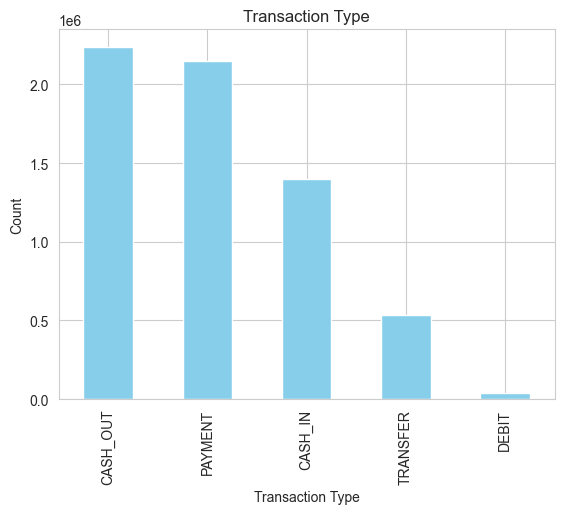

In [18]:
df["type"].value_counts().plot(kind='bar',title='Transaction Type',color="skyblue"  )
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

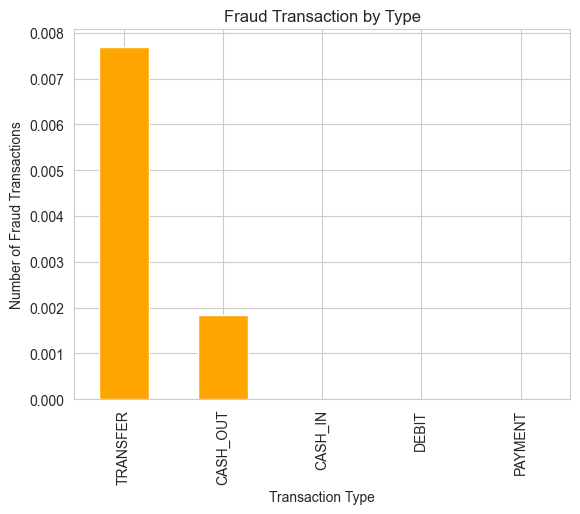

In [19]:
fraudbytype=df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraudbytype.plot(kind='bar',x='type',y='isFraud',title='Fraud Transaction by Type',color='orange')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Transactions')
plt.show()

In [20]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

In [21]:
df["balanceddifforig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balancediffdest"]=df["newbalanceDest"]-df["oldbalanceDest"]

In [22]:
df.drop(columns="step",inplace=True)

In [23]:
top_senders=df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [24]:
top_receivers=df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [25]:
fraud_users=df[df['isFraud']==1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [26]:
fraud_types=df[df["type"].isin(['CASH_OUT','TRANSFER'])]
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

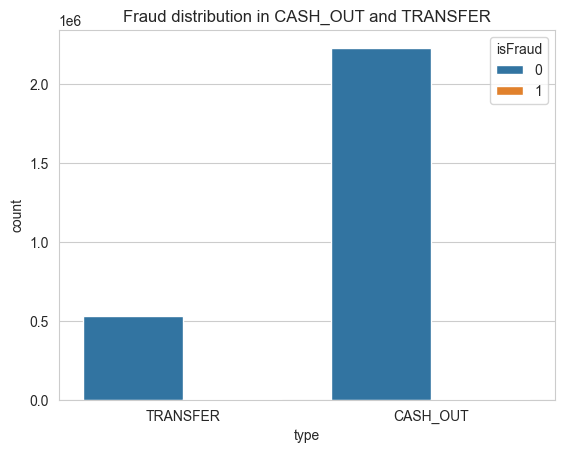

In [27]:
sns.countplot(x='type',hue='isFraud',data=fraud_types)
plt.title('Fraud distribution in CASH_OUT and TRANSFER')
plt.show()

In [28]:
corr=df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','balanceddifforig','balancediffdest','isFraud']].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceddifforig,balancediffdest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.102337,0.845964,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,-0.220297,-0.087032,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.267750,-0.094456,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.047460,0.232316,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,-0.006451,0.436191,0.000535
balanceddifforig,0.102337,-0.220297,-0.267750,-0.047460,-0.006451,1.000000,0.169292,0.362472
balancediffdest,0.845964,-0.087032,-0.094456,0.232316,0.436191,0.169292,1.000000,0.027028
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,0.362472,0.027028,1.000000


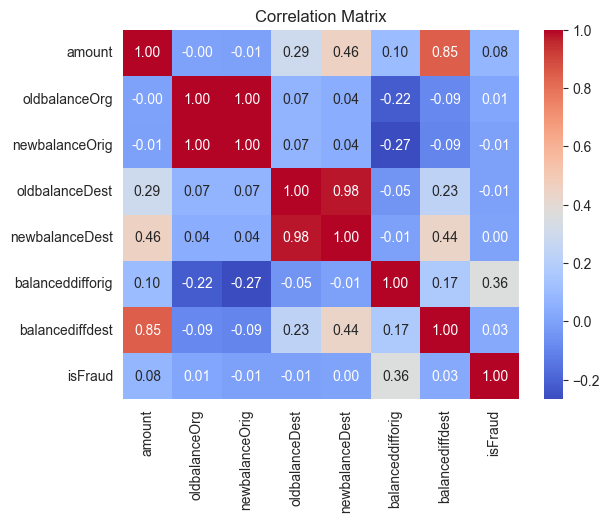

In [29]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f"  )
plt.title('Correlation Matrix')
plt.show()  

In [30]:
zero_after_transfer = df[(df["oldbalanceOrg"]>0) & (df["newbalanceOrig"] == 0) & (df["type"].isin(["TRANSFER", "CASH_OUT"]))]
len(zero_after_transfer)

1188074

FEATURE ENGINEERING AND ML MODEL 

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, precision_recall_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier



In [32]:
df_model = df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'], axis=1)
df_model["balance_diff_orig"] = df_model["oldbalanceOrg"] - df_model["newbalanceOrig"]
df_model["balance_diff_dest"] = df_model["newbalanceOrig"] - df_model["oldbalanceDest"]
df_model["amount_to_balance_ratio"] = df_model["amount"] / (df_model["oldbalanceOrg"] + 1)

In [33]:
categorical = ['type']
numerical = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest',
             'balance_diff_orig','balance_diff_dest','amount_to_balance_ratio']

X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']


In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [35]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop="first"), categorical)
])

In [36]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos  # imbalance ratio

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

In [37]:
pipeline = ImbPipeline(steps=[
    ("prep", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", xgb)
])

In [38]:
param_dist = {
    "clf__n_estimators": [200, 500, 800],
    "clf__max_depth": [4, 6, 8, 10],
    "clf__learning_rate": [0.01, 0.05, 0.1],
    "clf__subsample": [0.7, 0.9, 1.0],
    "clf__colsample_bytree": [0.7, 0.9, 1.0],
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(x_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END clf__colsample_bytree=0.9, clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, clf__subsample=0.7; total time= 1.3min
[CV] END clf__colsample_bytree=0.9, clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, clf__subsample=0.7; total time= 1.3min
[CV] END clf__colsample_bytree=0.9, clf__learning_rate=0.01, clf__max_depth=4, clf__n_estimators=200, clf__subsample=0.7; total time= 1.3min
[CV] END clf__colsample_bytree=0.9, clf__learning_rate=0.01, clf__max_depth=10, clf__n_estimators=200, clf__subsample=1.0; total time= 1.8min
[CV] END clf__colsample_bytree=0.9, clf__learning_rate=0.01, clf__max_depth=10, clf__n_estimators=200, clf__subsample=1.0; total time= 1.8min
[CV] END clf__colsample_bytree=0.7, clf__learning_rate=0.01, clf__max_depth=6, clf__n_estimators=200, clf__subsample=0.7; total time= 1.7min
[CV] END clf__colsample_bytree=0.7, clf__learning_rate=0.01, clf__max_depth=6, clf__n_estim

,estimator,"Pipeline(step...te=42, ...))])"
,param_distributions,"{'clf__colsample_bytree': [0.7, 0.9, ...], 'clf__learning_rate': [0.01, 0.05, ...], 'clf__max_depth': [4, 6, ...], 'clf__n_estimators': [200, 500, ...], ...}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [39]:
print("Best Parameters:", search.best_params_)
print("Best CV F1 Score:", search.best_score_)

Best Parameters: {'clf__subsample': 1.0, 'clf__n_estimators': 800, 'clf__max_depth': 10, 'clf__learning_rate': 0.05, 'clf__colsample_bytree': 0.9}
Best CV F1 Score: 0.3908343264661376


In [40]:
y_proba = search.predict_proba(x_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold:.3f}")
print(f"Best F1 Score: {f1_scores[best_idx]:.4f}, Recall: {recalls[best_idx]:.4f}")

Best Threshold: 1.000
Best F1 Score: 0.9254, Recall: 0.9619


In [41]:
y_pred = (y_proba >= best_threshold).astype(int)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999   1906322
           1     0.8916    0.9619    0.9254      2464

    accuracy                         0.9998   1908786
   macro avg     0.9458    0.9808    0.9627   1908786
weighted avg     0.9998    0.9998    0.9998   1908786



In [44]:
import joblib

# Save the best model from your search (or pipeline if not tuned)
joblib.dump(search.best_estimator_, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']